In [17]:
import pandas as pd
from common import GannSwing, get_lags
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv("./data/dax-data.csv")
df = data.drop("Unnamed: 0", axis=1).copy()
df.head()

,date,open,high,low,close,iblow,ibhigh,ibclose,range,ibrange,daydir,ibdir,ibdaytype,weekday
0,2021-03-04,14015.44,14095.81,13959.27,14056.34,13976.44,14056.32,14006.65,136.54,79.88,up,down,both-broken,3
1,2021-03-05,13958.54,14068.03,13868.20,13920.69,13868.20,13970.17,13901.60,199.83,101.97,down,down,high-broken,4
2,2021-03-08,14024.57,14402.92,13977.13,14380.91,13977.13,14050.00,14013.16,425.79,72.87,up,down,high-broken,0
3,2021-03-09,14345.51,14475.65,14309.35,14437.94,14309.35,14403.48,14392.05,166.30,94.13,up,up,high-broken,1
4,2021-03-10,14439.45,14560.97,14408.52,14540.25,14408.52,14488.46,14477.09,152.45,79.94,up,up,high-broken,2


In [19]:
for c in ["high", "low"]:
    get_lags(df, c, 2)

In [20]:
df["swing"] = df.apply(GannSwing(), axis=1)

In [21]:
df

,date,open,high,low,close,iblow,ibhigh,ibclose,range,ibrange,daydir,ibdir,ibdaytype,weekday,high_lag_1,high_lag_2,low_lag_1,low_lag_2,swing
0,2021-03-04,14015.44,14095.81,13959.27,14056.34,13976.44,14056.32,14006.65,136.54,79.88,up,down,both-broken,3,NaN,NaN,NaN,NaN,up
1,2021-03-05,13958.54,14068.03,13868.20,13920.69,13868.20,13970.17,13901.60,199.83,101.97,down,down,high-broken,4,14095.81,NaN,13959.27,NaN,up
2,2021-03-08,14024.57,14402.92,13977.13,14380.91,13977.13,14050.00,14013.16,425.79,72.87,up,down,high-broken,0,14068.03,14095.81,13868.20,13959.27,up
3,2021-03-09,14345.51,14475.65,14309.35,14437.94,14309.35,14403.48,14392.05,166.30,94.13,up,up,high-broken,1,14402.92,14068.03,13977.13,13868.20,up
4,2021-03-10,14439.45,14560.97,14408.52,14540.25,14408.52,14488.46,14477.09,152.45,79.94,up,up,high-broken,2,14475.65,14402.92,14309.35,13977.13,up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,2022-03-28,14376.00,14627.58,14371.90,14417.37,14371.90,14527.01,14504.18,255.68,155.11,up,up,high-broken,0,14428.03,14375.82,14247.38,14187.82,up
272,2022-03-29,14592.74,14925.25,14553.71,14820.33,14553.71,14664.29,14603.33,371.54,110.58,up,up,high-broken,1,14627.58,14428.03,14371.90,14247.38,up
273,2022-03-30,14712.32,14744.72,14555.87,14606.05,14586.01,14744.72,14620.20,188.85,158.71,down,down,low-broken,2,14925.25,14627.58,14553.71,14371.90,up
274,2022-03-31,14674.83,14732.00,14404.03,14414.75,14603.31,14732.00,14607.18,327.97,128.69,down,down,low-broken,3,14744.72,14925.25,14555.87,14553.71,up


In [22]:
df.swing.value_counts()

up      149
down    127
Name: swing, dtype: int64

<AxesSubplot:ylabel='close'>

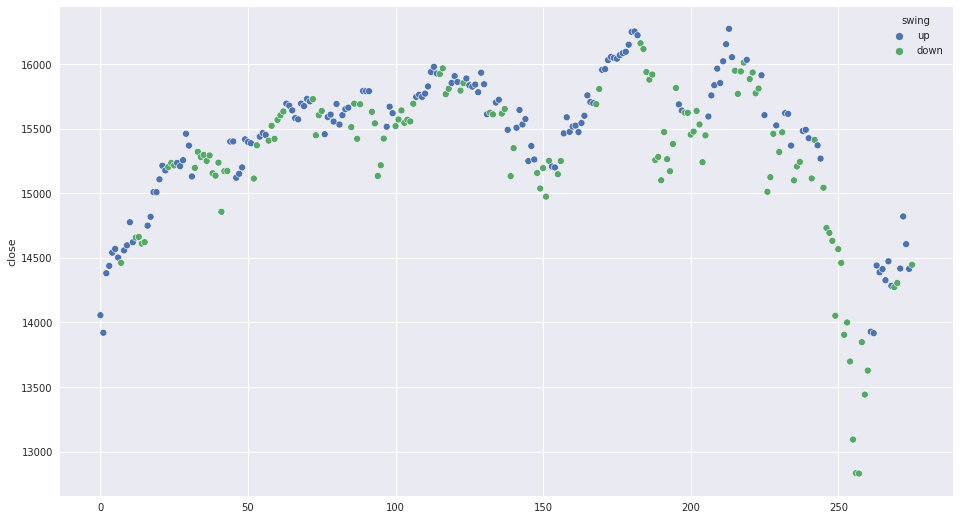

In [27]:
plt.style.use("seaborn")
plt.figure(figsize=(16,9))
sns.scatterplot(x=df.index, y=df.close, hue=df.swing)

In [30]:
swcopy = df.copy()
get_lags(swcopy, "swing", 1)


In [42]:
swingctab = pd.crosstab(swcopy.ibdir, swcopy.daydir)
swingctab

daydir,down,up
ibdir,,
down,92,55
up,33,96


In [43]:
from scipy.stats import chi2_contingency

In [44]:
chi2_contingency(swingctab)

(36.48931374132898,
 1.5350553337373955e-09,
 1,
 array([[66.57608696, 80.42391304],
        [58.42391304, 70.57608696]]))

In [56]:
import pandas_ta as ta
emacopy = df.copy()

In [57]:
emacopy["ema10"] = emacopy.ta.sma(10)
emacopy = emacopy.dropna().copy()

In [73]:
def pos(a, b):
    if a > b:
        return "up"
    if a == b:
        return "eq"
    return "down"
emacopy["emapos"] = emacopy.apply(lambda r: pos(r.open ,r.ema10), axis=1)

In [74]:
emacopy.emapos.value_counts()

up      162
down    105
Name: emapos, dtype: int64

In [77]:
emaposctab =pd.crosstab(emacopy.emapos, emacopy.daydir)
emaposctab

daydir,down,up
emapos,,
down,37,68
up,86,76


In [78]:
chi2_contingency(emaposctab)

(7.465928063298486,
 0.006287760830428312,
 1,
 array([[48.37078652, 56.62921348],
        [74.62921348, 87.37078652]]))

In [82]:
(emacopy.emapos != emacopy.ibdir).mean()

0.5955056179775281